# Homework #5
---
Student Name: Sam Crane

Student ID: 801101091

GitHub: https://github.com/samofuture/Intro-to-ML

In [794]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.optim as optim
# use seaborn plotting defaults
import seaborn as sns; sns.set()

# Problem 1

In [795]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [796]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

In [797]:
def linear_model(t_u, w1, b):
    return w1 * t_u + b

In [798]:
def training_loop(num_epochs, optimizer, params: torch.Tensor, t_u, t_c, linear: bool = False):
    for epoch in range(1, num_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        if not linear:
            t_p = model(t_u, *params)
        else:
            t_p = linear_model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch} Loss: {float(loss)}")

    return params

In [799]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] 
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)
t_un = (t_u - t_u.min()) / (t_u.max() - t_u.min())

## ADAM Optimizer

### 0.1 Learning Rate

In [800]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.1)
best_params = training_loop(5000, optimizer, params=params, t_u=t_un, t_c=t_c)
best_params

Epoch 500 Loss: 2.751105546951294
Epoch 1000 Loss: 2.3994340896606445
Epoch 1500 Loss: 2.263638734817505
Epoch 2000 Loss: 2.168210983276367
Epoch 2500 Loss: 2.1171624660491943


Epoch 3000 Loss: 2.0971312522888184
Epoch 3500 Loss: 2.091726303100586
Epoch 4000 Loss: 2.0908114910125732
Epoch 4500 Loss: 2.0907235145568848
Epoch 5000 Loss: 2.0907206535339355


tensor([10.2264, 22.2948, -3.9061], requires_grad=True)

### 0.01 Learning Rate

In [801]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.01)
training_loop(5000, optimizer, params=params, t_u=t_un, t_c=t_c)

Epoch 500 Loss: 43.87403106689453
Epoch 1000 Loss: 23.40558433532715
Epoch 1500 Loss: 16.16440773010254
Epoch 2000 Loss: 10.451733589172363
Epoch 2500 Loss: 6.443504333496094
Epoch 3000 Loss: 4.107592582702637
Epoch 3500 Loss: 3.0116372108459473
Epoch 4000 Loss: 2.6113815307617188
Epoch 4500 Loss: 2.4906833171844482
Epoch 5000 Loss: 2.4417731761932373


tensor([16.6260, 15.4963, -2.5505], requires_grad=True)

### 0.001 Learning Rate

In [802]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.001)
training_loop(5000, optimizer, params=params, t_u=t_un, t_c=t_c)

Epoch 500 Loss: 141.23663330078125
Epoch 1000 Loss: 122.945556640625
Epoch 1500 Loss: 106.80143737792969
Epoch 2000 Loss: 92.5957260131836
Epoch 2500 Loss: 80.15706634521484
Epoch 3000 Loss: 69.34261322021484
Epoch 3500 Loss: 60.029788970947266
Epoch 4000 Loss: 52.10824203491211
Epoch 4500 Loss: 45.47208786010742
Epoch 5000 Loss: 40.012351989746094


tensor([5.4156, 5.3362, 4.0237], requires_grad=True)

### 0.0001 Learning Rate

In [803]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.0001)
training_loop(5000, optimizer, params=params, t_u=t_un, t_c=t_c)

Epoch 500 Loss: 159.7061767578125
Epoch 1000 Loss: 157.54910278320312
Epoch 1500 Loss: 155.41587829589844
Epoch 2000 Loss: 153.30519104003906
Epoch 2500 Loss: 151.21585083007812
Epoch 3000 Loss: 149.14695739746094
Epoch 3500 Loss: 147.09756469726562
Epoch 4000 Loss: 145.06761169433594
Epoch 4500 Loss: 143.05577087402344
Epoch 5000 Loss: 141.06312561035156


tensor([1.4953, 1.4948, 0.4935], requires_grad=True)

## SGD Optimizer

### 0.1 Learning Rate

In [804]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.1)
training_loop(5000, optimizer, params=params, t_u=t_un, t_c=t_c)

Epoch 500 Loss: 2.2482290267944336
Epoch 1000 Loss: 2.1626265048980713
Epoch 1500 Loss: 2.1235475540161133
Epoch 2000 Loss: 2.105706214904785
Epoch 2500 Loss: 2.097562074661255
Epoch 3000 Loss: 2.093844413757324
Epoch 3500 Loss: 2.092146158218384
Epoch 4000 Loss: 2.091371774673462
Epoch 4500 Loss: 2.091017484664917
Epoch 5000 Loss: 2.090855836868286


tensor([10.3515, 22.1651, -3.8814], requires_grad=True)

### 0.01 Learning Rate

In [805]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.01)
training_loop(5000, optimizer, params=params, t_u=t_un, t_c=t_c)

Epoch 500 Loss: 7.31503438949585
Epoch 1000 Loss: 2.9870688915252686
Epoch 1500 Loss: 2.436879873275757
Epoch 2000 Loss: 2.351578712463379
Epoch 2500 Loss: 2.3246498107910156
Epoch 3000 Loss: 2.3061230182647705
Epoch 3500 Loss: 2.2897753715515137
Epoch 4000 Loss: 2.2747533321380615
Epoch 4500 Loss: 2.2608797550201416
Epoch 5000 Loss: 2.248051404953003


tensor([14.5804, 17.7796, -3.0443], requires_grad=True)

### 0.001 Learning Rate

In [806]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.001)
training_loop(5000, optimizer, params=params, t_u=t_un, t_c=t_c)

Epoch 500 Loss: 42.169071197509766
Epoch 1000 Loss: 29.084794998168945
Epoch 1500 Loss: 23.6975154876709
Epoch 2000 Loss: 19.651195526123047
Epoch 2500 Loss: 16.389543533325195
Epoch 3000 Loss: 13.745458602905273
Epoch 3500 Loss: 11.601007461547852
Epoch 4000 Loss: 9.861629486083984
Epoch 4500 Loss: 8.450728416442871
Epoch 5000 Loss: 7.306186199188232


tensor([11.9285, 12.2284,  0.9594], requires_grad=True)

### 0.0001 Learning Rate

In [807]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.0001)
training_loop(5000, optimizer, params=params, t_u=t_un, t_c=t_c)

Epoch 500 Loss: 132.0695343017578
Epoch 1000 Loss: 109.2575454711914
Epoch 1500 Loss: 91.80365753173828
Epoch 2000 Loss: 78.41097259521484
Epoch 2500 Loss: 68.09719848632812
Epoch 3000 Loss: 60.11845397949219
Epoch 3500 Loss: 53.911415100097656
Epoch 4000 Loss: 49.04937744140625
Epoch 4500 Loss: 45.209232330322266
Epoch 5000 Loss: 42.146183013916016


tensor([4.3909, 5.2344, 4.7822], requires_grad=True)

## Linear vs. Nonlinear

## ADAM Optimizer

In [808]:
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([lin_params], 0.1)
linear_params = training_loop(5000, optimizer, lin_params, t_u=t_un, t_c=t_c, linear=True)
linear_params

Epoch 500 Loss: 9.509765625
Epoch 1000 Loss: 3.051999807357788
Epoch 1500 Loss: 2.927941083908081
Epoch 2000 Loss: 2.927644968032837
Epoch 2500 Loss: 2.9276463985443115
Epoch 3000 Loss: 2.9276459217071533
Epoch 3500 Loss: 2.9276459217071533
Epoch 4000 Loss: 2.9276459217071533
Epoch 4500 Loss: 2.927645206451416
Epoch 5000 Loss: 2.927645683288574


tensor([32.2600, -5.6031], requires_grad=True)

## SGD Optimizer

In [809]:
lin_params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([lin_params], 0.01)
training_loop(5000, optimizer, lin_params, t_u=t_un, t_c=t_c, linear=True)

Epoch 500 Loss: 19.66142463684082
Epoch 1000 Loss: 8.339456558227539
Epoch 1500 Loss: 4.677872180938721
Epoch 2000 Loss: 3.4936881065368652
Epoch 2500 Loss: 3.110708475112915
Epoch 3000 Loss: 2.986849308013916
Epoch 3500 Loss: 2.9467933177948
Epoch 4000 Loss: 2.9338371753692627
Epoch 4500 Loss: 2.929647922515869
Epoch 5000 Loss: 2.9282941818237305


tensor([32.1654, -5.5531], requires_grad=True)

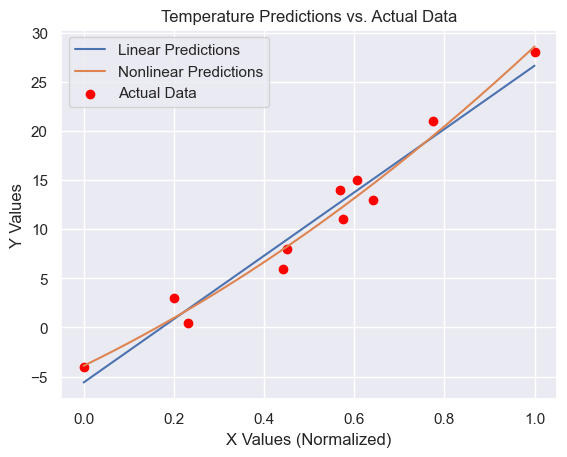

In [810]:
x_vals = np.linspace(t_un.min(), t_un.max(), 1000)

linear_predictions = linear_model(x_vals, float(linear_params[0]), float(linear_params[1]))
nonlinear_predictions = model(x_vals, float(best_params[0]), float(best_params[1]), float(best_params[2]))

# Assuming x_vals is adjusted for normalization
plt.plot(x_vals, linear_predictions, label='Linear Predictions')
plt.plot(x_vals, nonlinear_predictions, label='Nonlinear Predictions')
plt.scatter(t_un, t_c, label='Actual Data', color='red')

# Add titles and legends
plt.title('Temperature Predictions vs. Actual Data')
plt.xlabel('X Values (Normalized)')
plt.ylabel('Y Values')
plt.legend()

plt.show()

The models above have the following (best case) losses:
- Nonlinear (ADAM): 2.0907
- Nonlinear (SGD): 2.0908
- Linear (ADAM): 2.9276
- Linear (SGD): 2.9283

This shows numerically how the nonlinear model fits the data better. The model also visually fits the data better.

Comparing the ADAM and the SGD optimizers, the SGD looks like it handles a larger learning rate better than a smaller one like ADAM, but performs a little worse.

# Problem 2

In [811]:
def linear_model(t_in, weights, bias):
    return torch.matmul(t_in, weights.double()) + bias

In [812]:
def training_loop(num_epochs, optimizer, params: torch.Tensor, t_in, t_out, v_in, v_out):
    for epoch in range(1, num_epochs+1):
        if params.grad is not None:
            params.grad.zero_()
        
        t_p = linear_model(t_in, params[:-1], params[-1])
        train_loss = loss_fn(t_p, t_out)
        

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            v_p = linear_model(v_in, params[:-1], params[-1])
            valid_loss = loss_fn(v_p, v_out)
            print(f"Epoch {epoch}:")
            print(f"\tTraining Loss: {float(train_loss)}")
            print(f"\tValidation Loss: {float(valid_loss)}")

    return params

In [813]:
def prep_data() -> pd.DataFrame:
    df = pd.read_csv("Housing.csv")

    df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
    df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
    df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
    df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
    df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
    df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
    df['furnishingstatus'] = df['furnishingstatus'].apply(lambda x: 2 if x == 'furnished' else 0)

    return df

In [814]:
og_df = prep_data()
# area, bedrooms, bathrooms, stories, parking
price = og_df.pop('price').to_numpy()
df = og_df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']]
df.head()

,area,bedrooms,bathrooms,stories,parking
0,7420,4,2,3,2
1,8960,4,4,4,3
2,9960,3,2,2,2
3,7500,4,2,2,3
4,7420,4,1,2,2


In [815]:
scaler_x = StandardScaler()
data = scaler_x.fit_transform(df)

X_train, X_test, Y_train, Y_test = train_test_split(data, price, test_size=0.2, random_state=15)

train_inputs = torch.tensor(X_train)
train_outputs = torch.tensor(Y_train)
Y_test = torch.tensor(Y_test)
X_test = torch.tensor(X_test)

## ADAM Optimizer

### 0.1 Learning Rate

In [816]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.1)
housing_lin_params = training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)
housing_lin_params

Epoch 500:
	Training Loss: 25922038059221.56
	Validation Loss: 27376514717869.215


Epoch 1000:
	Training Loss: 25921145965231.312
	Validation Loss: 27375621239662.55
Epoch 1500:
	Training Loss: 25920253913132.258
	Validation Loss: 27374727807284.727
Epoch 2000:
	Training Loss: 25919361967566.91
	Validation Loss: 27373834485028.105
Epoch 2500:
	Training Loss: 25918470114945.273
	Validation Loss: 27372941264065.88
Epoch 3000:
	Training Loss: 25917578267681.11
	Validation Loss: 27372048048916.305
Epoch 3500:
	Training Loss: 25916686464661.742
	Validation Loss: 27371154882178.035
Epoch 4000:
	Training Loss: 25915794713223.87
	Validation Loss: 27370261771682.12
Epoch 4500:
	Training Loss: 25914903013367.496
	Validation Loss: 27369368717428.56
Epoch 5000:
	Training Loss: 25914011365092.613
	Validation Loss: 27368475719417.35


tensor([500.9217, 500.9103, 500.9128, 500.9115, 500.9130, 500.0050],
       requires_grad=True)

### 0.01 Learning Rate

In [817]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.01)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 25922839404500.293
	Validation Loss: 27377318918502.09
Epoch 1000:
	Training Loss: 25922750182905.18
	Validation Loss: 27377229557848.98
Epoch 1500:
	Training Loss: 25922660961025.285
	Validation Loss: 27377140196988.28
Epoch 2000:
	Training Loss: 25922571739669.418
	Validation Loss: 27377050836682.504
Epoch 2500:
	Training Loss: 25922482518821.637
	Validation Loss: 27376961476939.42
Epoch 3000:
	Training Loss: 25922393298489.918
	Validation Loss: 27376872117759.035
Epoch 3500:
	Training Loss: 25922304090443.97
	Validation Loss: 27376782770923.37
Epoch 4000:
	Training Loss: 25922214888161.082
	Validation Loss: 27376693429911.55
Epoch 4500:
	Training Loss: 25922125686394.06
	Validation Loss: 27376604089462.215
Epoch 5000:
	Training Loss: 25922036485142.895
	Validation Loss: 27376514749575.36


tensor([50.9973, 50.9973, 50.9973, 50.9973, 50.9973, 49.9976],
       requires_grad=True)

### 0.001 Learning Rate

In [818]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.001)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 25922919542237.105
	Validation Loss: 27377399342025.26
Epoch 1000:
	Training Loss: 25922910619997.715
	Validation Loss: 27377390405882.32
Epoch 1500:
	Training Loss: 25922901697978.598
	Validation Loss: 27377381469942.12
Epoch 2000:
	Training Loss: 25922892775965.074
	Validation Loss: 27377372534007.53
Epoch 2500:
	Training Loss: 25922883854521.13
	Validation Loss: 27377363598657.535
Epoch 3000:
	Training Loss: 25922874933083.477
	Validation Loss: 27377354663313.164
Epoch 3500:
	Training Loss: 25922866011650.992
	Validation Loss: 27377345727974.42
Epoch 4000:
	Training Loss: 25922857090223.656
	Validation Loss: 27377336792641.305
Epoch 4500:
	Training Loss: 25922848168799.22
	Validation Loss: 27377327857311.496
Epoch 5000:
	Training Loss: 25922839247382.207
	Validation Loss: 27377318921989.63


tensor([5.9998, 5.9998, 5.9998, 5.9998, 5.9998, 4.9998], requires_grad=True)

### 0.0001 Learning Rate

In [819]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.001)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 25922919542237.105
	Validation Loss: 27377399342025.26
Epoch 1000:
	Training Loss: 25922910619997.715
	Validation Loss: 27377390405882.32
Epoch 1500:
	Training Loss: 25922901697978.598
	Validation Loss: 27377381469942.12
Epoch 2000:
	Training Loss: 25922892775965.074
	Validation Loss: 27377372534007.53
Epoch 2500:
	Training Loss: 25922883854521.13
	Validation Loss: 27377363598657.535
Epoch 3000:
	Training Loss: 25922874933083.477
	Validation Loss: 27377354663313.164
Epoch 3500:
	Training Loss: 25922866011650.992
	Validation Loss: 27377345727974.42
Epoch 4000:
	Training Loss: 25922857090223.656
	Validation Loss: 27377336792641.305
Epoch 4500:
	Training Loss: 25922848168799.22
	Validation Loss: 27377327857311.496
Epoch 5000:
	Training Loss: 25922839247382.207
	Validation Loss: 27377318921989.63


tensor([5.9998, 5.9998, 5.9998, 5.9998, 5.9998, 4.9998], requires_grad=True)

## SGD Optimizer

### 0.1 Learning Rate

In [820]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.1)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 1000:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 1500:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 2000:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 2500:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 3000:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 3500:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 4000:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 4500:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132
Epoch 5000:
	Training Loss: 1507382604577.2354
	Validation Loss: 1662434492724.132


tensor([ 766161.7500,  128552.7109,  505373.0938,  518739.1562,  283620.4062,
        4740832.0000], requires_grad=True)

### 0.01 Learning Rate

In [821]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.01)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 1507386215444.318
	Validation Loss: 1662248158546.9
Epoch 1000:
	Training Loss: 1507382604776.3484
	Validation Loss: 1662436266422.8076
Epoch 1500:
	Training Loss: 1507382604729.9468
	Validation Loss: 1662436580651.684
Epoch 2000:
	Training Loss: 1507382604729.9468
	Validation Loss: 1662436580651.684
Epoch 2500:
	Training Loss: 1507382604729.9468
	Validation Loss: 1662436580651.684
Epoch 3000:
	Training Loss: 1507382604729.9468
	Validation Loss: 1662436580651.684
Epoch 3500:
	Training Loss: 1507382604729.9468
	Validation Loss: 1662436580651.684
Epoch 4000:
	Training Loss: 1507382604729.9468
	Validation Loss: 1662436580651.684
Epoch 4500:
	Training Loss: 1507382604729.9468
	Validation Loss: 1662436580651.684
Epoch 5000:
	Training Loss: 1507382604729.9468
	Validation Loss: 1662436580651.684


tensor([ 766160.0625,  128554.1406,  505372.1562,  518738.0625,  283621.8125,
        4740821.0000], requires_grad=True)

### 0.001 Learning Rate

In [822]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.001)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 4641716340687.084
	Validation Loss: 5322454411895.079
Epoch 1000:
	Training Loss: 1943805189537.7068
	Validation Loss: 2271569319505.7476
Epoch 1500:
	Training Loss: 1572475413525.521
	Validation Loss: 1780470312898.3574
Epoch 2000:
	Training Loss: 1518214421849.922
	Validation Loss: 1688471739953.9717
Epoch 2500:
	Training Loss: 1509500415948.3904
	Validation Loss: 1668249916813.992
Epoch 3000:
	Training Loss: 1507877293003.6233
	Validation Loss: 1663352000621.6482
Epoch 3500:
	Training Loss: 1507515802958.6023
	Validation Loss: 1662228525386.9253
Epoch 4000:
	Training Loss: 1507421699291.8513
	Validation Loss: 1662078223581.3801
Epoch 4500:
	Training Loss: 1507394613449.1782
	Validation Loss: 1662153069945.7844
Epoch 5000:
	Training Loss: 1507386371617.8171
	Validation Loss: 1662249069560.7776


tensor([ 765719.5000,  130439.9297,  504659.3125,  517359.2812,  284054.4375,
        4740416.5000], requires_grad=True)

### 0.0001 Learning Rate

In [823]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.0001)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 21258326769161.105
	Validation Loss: 22626776042540.562
Epoch 1000:
	Training Loss: 17511808227876.092
	Validation Loss: 18799129217945.29
Epoch 1500:
	Training Loss: 14499868528241.479
	Validation Loss: 15703650394132.19
Epoch 2000:
	Training Loss: 12071740582446.129
	Validation Loss: 13192035229698.766
Epoch 2500:
	Training Loss: 10109518632874.418
	Validation Loss: 11148231494982.557
Epoch 3000:
	Training Loss: 8520428771927.033
	Validation Loss: 9480792609376.025
Epoch 3500:
	Training Loss: 7231153460144.087
	Validation Loss: 8117297392306.548
Epoch 4000:
	Training Loss: 6183440535891.59
	Validation Loss: 7000041872257.728
Epoch 4500:
	Training Loss: 5330849624586.3955
	Validation Loss: 6082868943709.304
Epoch 5000:
	Training Loss: 4636188633076.935
	Validation Loss: 5328663224149.18


tensor([ 541967.8750,  305071.5000,  379193.1875,  342289.7188,  304700.3750,
        2993756.2500], requires_grad=True)

The models above have the following (best case) validation losses:
- ADAM: 
    - 0.1: 27368475719417.35
    - 0.01: 27376514749575.36
    - 0.001: 27377318921989.63
    - 0.0001: 27377318921989.63
- SGD:
    - 0.1: 1662434492724.132
    - 0.01: 1662436580651.684
    - 0.001: 1662249069560.7776
    - 0.0001: 5328663224149.18

In my previous homework the losses were close to about 1.5e13. The ADAM set has a worse loss than the original linear regression, however the SGD set has a significantly better loss of 1.6e12.

# Problem 3

In [824]:
og_df = prep_data()
price = og_df.pop('price').to_numpy()

scaler_x = StandardScaler()
data = scaler_x.fit_transform(og_df)

X_train, X_test, Y_train, Y_test = train_test_split(data, price, test_size=0.2, random_state=15)

train_inputs = torch.tensor(X_train)
train_outputs = torch.tensor(Y_train)
Y_test = torch.tensor(Y_test)
X_test = torch.tensor(X_test)
og_df.head()


,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,0
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


## ADAM Optimizer

### 0.1 Learning Rate

In [825]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.1)
housing_lin_params = training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)
housing_lin_params

Epoch 500:
	Training Loss: 25921731391188.605
	Validation Loss: 27375986125170.15
Epoch 1000:
	Training Loss: 25920538168385.363
	Validation Loss: 27374574605766.4
Epoch 1500:
	Training Loss: 25919345110838.19
	Validation Loss: 27373163317829.445
Epoch 2000:
	Training Loss: 25918152283883.453
	Validation Loss: 27371752316530.254
Epoch 2500:
	Training Loss: 25916959622628.543
	Validation Loss: 27370341519823.57
Epoch 3000:
	Training Loss: 25915767029863.344
	Validation Loss: 27368930823996.863
Epoch 3500:
	Training Loss: 25914574572377.652
	Validation Loss: 27367520323728.13
Epoch 4000:
	Training Loss: 25913382257335.465
	Validation Loss: 27366110006308.21
Epoch 4500:
	Training Loss: 25912190098532.78
	Validation Loss: 27364699867796.37
Epoch 5000:
	Training Loss: 25910998086953.48
	Validation Loss: 27363289898558.938


tensor([500.9055, 500.9014, 500.8997, 500.9022, 500.8670, 500.5865, 500.7296,
        500.8219, 500.9032, 500.8975, 500.8954, 500.8673, 500.0066],
       requires_grad=True)

### 0.01 Learning Rate

In [826]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.01)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 25922803308964.93
	Validation Loss: 27377256721000.53


Epoch 1000:
	Training Loss: 25922683958313.18
	Validation Loss: 27377115530995.426
Epoch 1500:
	Training Loss: 25922564608382.98
	Validation Loss: 27376974342150.31
Epoch 2000:
	Training Loss: 25922445259165.72
	Validation Loss: 27376833155461.29
Epoch 2500:
	Training Loss: 25922325911295.426
	Validation Loss: 27376691970372.992
Epoch 3000:
	Training Loss: 25922206564785.207
	Validation Loss: 27376550786888.55
Epoch 3500:
	Training Loss: 25922087235827.047
	Validation Loss: 27376409622289.65
Epoch 4000:
	Training Loss: 25921967914494.715
	Validation Loss: 27376268465605.73
Epoch 4500:
	Training Loss: 25921848594521.973
	Validation Loss: 27376127310525.137
Epoch 5000:
	Training Loss: 25921729275908.824
	Validation Loss: 27375986157047.863


tensor([50.9973, 50.9973, 50.9973, 50.9973, 50.9971, 50.9934, 50.9963, 50.9969,
        50.9973, 50.9972, 50.9972, 50.9970, 49.9976], requires_grad=True)

### 0.001 Learning Rate

In [827]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.001)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 25922910508979.84
	Validation Loss: 27377383792113.66
Epoch 1000:
	Training Loss: 25922898573568.91
	Validation Loss: 27377369672526.203
Epoch 1500:
	Training Loss: 25922886638745.15
	Validation Loss: 27377355553769.773
Epoch 2000:
	Training Loss: 25922874703936.137
	Validation Loss: 27377341435029.38
Epoch 2500:
	Training Loss: 25922862769705.156
	Validation Loss: 27377327316883.984
Epoch 3000:
	Training Loss: 25922850835488.9
	Validation Loss: 27377313198754.625
Epoch 3500:
	Training Loss: 25922838901286.242
	Validation Loss: 27377299080641.305
Epoch 4000:
	Training Loss: 25922826967097.184
	Validation Loss: 27377284962544.016
Epoch 4500:
	Training Loss: 25922815032919.465
	Validation Loss: 27377270844460.45
Epoch 5000:
	Training Loss: 25922803098757.6
	Validation Loss: 27377256726395.24


tensor([5.9998, 5.9998, 5.9998, 5.9998, 5.9998, 5.9998, 5.9998, 5.9998, 5.9998,
        5.9998, 5.9998, 5.9998, 4.9998], requires_grad=True)

### 0.0001 Learning Rate

In [828]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], 0.0001)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 25922921229316.71
	Validation Loss: 27377396499670.953
Epoch 1000:
	Training Loss: 25922920035673.953
	Validation Loss: 27377395087585.18
Epoch 1500:
	Training Loss: 25922918842031.4
	Validation Loss: 27377393675499.637
Epoch 2000:
	Training Loss: 25922917648388.91
	Validation Loss: 27377392263414.184
Epoch 2500:
	Training Loss: 25922916454746.56
	Validation Loss: 27377390851329.03
Epoch 3000:
	Training Loss: 25922915261175.035
	Validation Loss: 27377389439316.27
Epoch 3500:
	Training Loss: 25922914067603.652
	Validation Loss: 27377388027303.668
Epoch 4000:
	Training Loss: 25922912874032.41
	Validation Loss: 27377386615291.23
Epoch 4500:
	Training Loss: 25922911680461.293
	Validation Loss: 27377385203278.945
Epoch 5000:
	Training Loss: 25922910486890.312
	Validation Loss: 27377383791266.824


tensor([1.5001, 1.5001, 1.5001, 1.5001, 1.5001, 1.5001, 1.5001, 1.5001, 1.5001,
        1.5001, 1.5001, 1.5001, 0.5000], requires_grad=True)

## SGD Optimizer

### 0.1 Learning Rate

In [829]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.1)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 1000:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 1500:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 2000:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 2500:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 3000:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 3500:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 4000:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 4500:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404
Epoch 5000:
	Training Loss: 1090467899724.8202
	Validation Loss: 1377610385759.4404


tensor([ 566222.0625,  112292.5625,  430681.3438,  433103.7812,  170471.9844,
          53671.8516,  197902.0625,  183952.2031,  454856.2188,  204145.7344,
         271416.5938,   79551.2578, 4755640.5000], requires_grad=True)

### 0.01 Learning Rate

In [830]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.01)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 1090479734892.7542
	Validation Loss: 1376975953311.8682
Epoch 1000:
	Training Loss: 1090467902857.2993
	Validation Loss: 1377594844195.945
Epoch 1500:
	Training Loss: 1090467899886.6433
	Validation Loss: 1377610918904.6133
Epoch 2000:
	Training Loss: 1090467899886.6433
	Validation Loss: 1377610918904.6133
Epoch 2500:
	Training Loss: 1090467899886.6433
	Validation Loss: 1377610918904.6133
Epoch 3000:
	Training Loss: 1090467899886.6433
	Validation Loss: 1377610918904.6133
Epoch 3500:
	Training Loss: 1090467899886.6433
	Validation Loss: 1377610918904.6133
Epoch 4000:
	Training Loss: 1090467899886.6433
	Validation Loss: 1377610918904.6133
Epoch 4500:
	Training Loss: 1090467899886.6433
	Validation Loss: 1377610918904.6133
Epoch 5000:
	Training Loss: 1090467899886.6433
	Validation Loss: 1377610918904.6133


tensor([ 566219.8125,  112293.8203,  430682.2812,  433101.5000,  170472.7812,
          53671.8633,  197900.5781,  183952.9375,  454857.5000,  204146.0938,
         271417.5938,   79551.3047, 4755629.0000], requires_grad=True)

### 0.001 Learning Rate

In [831]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.001)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 4222745994444.868
	Validation Loss: 4870651697414.323
Epoch 1000:
	Training Loss: 1529634151516.2778
	Validation Loss: 1927493941369.3716
Epoch 1500:
	Training Loss: 1156077887251.0
	Validation Loss: 1474907239802.5115
Epoch 2000:
	Training Loss: 1101447805415.0837
	Validation Loss: 1396886639064.551
Epoch 2500:
	Training Loss: 1092701028757.6425
	Validation Loss: 1381184328787.9885
Epoch 3000:
	Training Loss: 1091051569037.6569
	Validation Loss: 1377540052026.2556
Epoch 3500:
	Training Loss: 1090658129800.5425
	Validation Loss: 1376711749001.1938
Epoch 4000:
	Training Loss: 1090539202864.3151
	Validation Loss: 1376647109632.326
Epoch 4500:
	Training Loss: 1090496683214.1729
	Validation Loss: 1376793159903.6584
Epoch 5000:
	Training Loss: 1090479965189.0006
	Validation Loss: 1376974799038.9314


tensor([ 564906.2500,  114946.6641,  430620.7812,  429760.5000,  171411.6719,
          54735.9023,  195709.6406,  184359.5469,  455962.8750,  204253.8750,
         271819.3750,   79684.7891, 4755194.5000], requires_grad=True)

### 0.0001 Learning Rate

In [832]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], 0.0001)
training_loop(5000, optimizer, params, t_in=train_inputs, t_out=train_outputs, v_in=X_test, v_out=Y_test)

Epoch 500:
	Training Loss: 21016725522192.53
	Validation Loss: 22315362295585.32
Epoch 1000:
	Training Loss: 17149738002054.932
	Validation Loss: 18333443285931.68
Epoch 1500:
	Training Loss: 14083016420022.963
	Validation Loss: 15171013401191.445
Epoch 2000:
	Training Loss: 11634161197368.83
	Validation Loss: 12639516396428.236
Epoch 2500:
	Training Loss: 9667791925794.832
	Validation Loss: 10600009046729.742
Epoch 3000:
	Training Loss: 8081782470019.58
	Validation Loss: 8948300625586.043
Epoch 3500:
	Training Loss: 6798012473899.022
	Validation Loss: 7605048058276.607
Epoch 4000:
	Training Loss: 5755944995054.791
	Validation Loss: 6508957487179.275
Epoch 4500:
	Training Loss: 4908173487794.751
	Validation Loss: 5612108117721.291
Epoch 5000:
	Training Loss: 4217230856032.463
	Validation Loss: 4876643615819.97


tensor([ 446630.5000,  280736.6250,  337751.0625,  294763.8125,  181535.0938,
          41578.7227,  105279.8672,  126069.5078,  356954.8438,  248250.8125,
         219036.3438,  156873.2500, 2998292.2500], requires_grad=True)

The models above have the following (best case) validation losses:
- ADAM: 
    - 0.1: 27363289898558.938
    - 0.01: 27375986157047.863
    - 0.001: 27377256726395.24
    - 0.0001: 27377383791266.824
- SGD:
    - 0.1: 1377610385759.4404
    - 0.01: 1377610918904.6133
    - 0.001: 1376974799038.9314
    - 0.0001: 4876643615819.97

In my previous homework the losses were close to about 1.5e13. The ADAM set has a worse loss than the original linear regression, however the SGD set has a significantly better loss of 1.3e12.